In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Pauli matrices
s0 = np.matrix([[1,0],[0,1]])
s1 = np.matrix([[0,1],[1,0]])
s2 = np.matrix([[0,-1.j],[1.j,0]])
s3 = np.matrix([[1,0],[0,-1]])

s = np.array([s0,s3,s1,s2])

In [3]:
#Gamma matrices
gamma_m = []
del gamma_m
gamma_m = []
for i in range(4):
    for j in range(4):
        cross_t = np.kron(s[i],s[j])
        gamma_m.append(cross_t)
gamma_m = 0.5*np.array(gamma_m)

In [4]:
# Espacio de Hilbert de polarizacines de 1 qubit en la base HV

# KETS
H = np.array([[1],[0]])
V = np.array([[0],[1]])

# Mutually unbiased basis respect to HV con las definiciones del paper de POLARIMETRY
D = 1./np.sqrt(2)*(H + V)
A = 1./np.sqrt(2)*(H - V)
L = 1./np.sqrt(2)*(H + 1.j*V)
R = 1./np.sqrt(2)*(H - 1.j*V)

# ARRAY DE ESTADOS
BASIS_Q1 = np.array([H,V,D,A,L,R]) #h6 V12 D18 A24 L30 R36
print(BASIS_Q1.shape)

(6, 2, 1)


In [5]:
#Espacio de Hilbert de polarizacion de 2 qubits:q1 y q2 en las bases H1,V1,H2,V2

"Primera letra es del qubit 1" 

# BASES DE LOS KETS PARA ESTADOS BIPARTITOS

BASIS_Q2 = ["HH","HV","HD","HA","HL","HR"]
orden2= [1,2,8,7,31,32,14,13,18,15,33,3,9,11,5,35]
ord2 = np.array(orden2)-1
BASIS_Q2J_s = ["HH","HV","VV","VH","RH","RV","DV","DH","DR","DD","RD","HD","VD","VL","HL","RL"]

In [6]:
#del BASIS_Q2J_kets
BASIS_Q2j_kets = []
for i in range(6):
    for j in range(6):
        cross_t = np.kron(BASIS_Q1[i],BASIS_Q1[j])
        BASIS_Q2j_kets.append(cross_t)

In [7]:
BASIS_Q2J_s = ["HH","HV","VV","VH","RH","RV","DV","DH","DR","DD","RD","HD","VD","VL","HL","RL"]
BASIS_Q2_kets = [BASIS_Q2j_kets[k] for k in ord2]
#BASIS_Q2_kets = [BASIS_Q2j_kets[k] for k in range(0,33,2)]

In [8]:
gamma_m[0]

array([[0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j],
       [0. +0.j, 0.5+0.j, 0. +0.j, 0. +0.j],
       [0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j],
       [0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j]])

In [9]:
#B matrices
Bmm = []
for i in range(16):
    for j in range(16):
        m2 = np.matmul(np.conjugate(BASIS_Q2_kets[i]).T,np.matmul(gamma_m[j],BASIS_Q2_kets[i]))
        Bmm.append(m2)
Bm = np.array(Bmm).reshape(16,16)

In [10]:
#Inverse B
In_Bm = np.linalg.inv(Bm)

In [11]:
np.set_printoptions(linewidth=200,precision=6,suppress=False)

In [12]:
# M matrices

M_m =[]
for i in range(16):
    M_mas = np.zeros((4,4))
    for k in range(16):
        M_mas = M_mas + In_Bm[k,i]*gamma_m[k]
    M_m.append(M_mas)
M_m = np.array(M_m)

In [13]:
#James Paper

data_j = np.array([34749,324,35805,444,16324,17521,13441,16901,17932,32028,15132,17238,13171,17170,16722,33586])
Normal= np.sum([data_j[0:4]])

densid_jm = np.sum(M_m*data_j.reshape(16,1,1),axis=0)/Normal
np.set_printoptions(linewidth=200)
print(densid_jm)

[[ 0.487213+0.j       -0.004185+0.01142j  -0.009752-0.017842j  0.519209+0.038025j]
 [-0.004185-0.01142j   0.004543+0.j        0.02713 -0.014596j -0.064826-0.00762j ]
 [-0.009752+0.017842j  0.02713 +0.014596j  0.006225+0.j       -0.069453+0.013383j]
 [ 0.519209-0.038025j -0.064826+0.00762j  -0.069453-0.013383j  0.502019+0.j      ]]


In [83]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.colors 
import matplotlib.ticker as ticker
import numpy as np


%matplotlib qt

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection= Axes3D.name)

def make_bar(ax, x0=0, y0=0, width = 0.5, height=1 , cmap="jet",  
              norm=matplotlib.colors.Normalize(vmin=-0.5, vmax=0.5), **kwargs ):
    # Make data
    u = np.linspace(0, 2*np.pi, 4+1)+np.pi/4.
    v_ = np.linspace(np.pi/4., 3./4*np.pi, 100)
    v = np.linspace(0, np.pi, len(v_)+2 )
    v[0] = 0 ;  v[-1] = np.pi; v[1:-1] = v_
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))

    xthr = np.sin(np.pi/4.)**2 ;  zthr = np.sin(np.pi/4.)
    x[x > xthr] = xthr; x[x < -xthr] = -xthr
    y[y > xthr] = xthr; y[y < -xthr] = -xthr
    z[z > zthr] = zthr  ; z[z < -zthr] = -zthr

    x *= 1./xthr*width; y *= 1./xthr*width
    z += zthr
    z *= height/(2.*zthr)
    #translate
    x += x0; y += y0
    #plot
    ax.plot_surface(x, y, z, cmap=cmap, norm=norm, **kwargs)

def make_bars(ax, x, y, height, width=1):
    widths = np.array(width)*np.ones_like(x)
    x = np.array(x).flatten()
    y = np.array(y).flatten()

    h = np.array(height).flatten()
    w = np.array(widths).flatten()
    norm = matplotlib.colors.Normalize(vmin=-0.5, vmax=0.5)
    for i in range(len(x.flatten())):
        make_bar(ax, x0=x[i], y0=y[i], width = w[i] , height=h[i], norm=norm)


X, Y = np.meshgrid([1,2,3,4],[1,2,3,4], indexing='ij')
Z = np.imag(p_MLE).flatten()

make_bars(ax, X,Y,Z, width=0.29, )

ax.set_xticks([1,2,3,4])
ax.set_yticks([1,2,3,4])
ax.set_xticklabels(['|HH⟩','|HV⟩','|VH⟩','|VV⟩'])
ax.set_yticklabels(['|HH⟩','|HV⟩','|VH⟩','|VV⟩'])
ax.set_zticks(np.arange(-0.2,0.52,0.1))
ax.view_init(elev=41, azim=-47) # Changes the elevation and azimuth
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)

def myfmt(x, pos):
    return '{0:.3f}'.format(x)

colourMap = plt.cm.ScalarMappable(cmap=plt.cm.jet)
colourMap.set_array([-0.5,0.5])
colBar = plt.colorbar(colourMap,format='%.3f')

ax.grid()
plt.show()

NameError: name 'x' is not defined

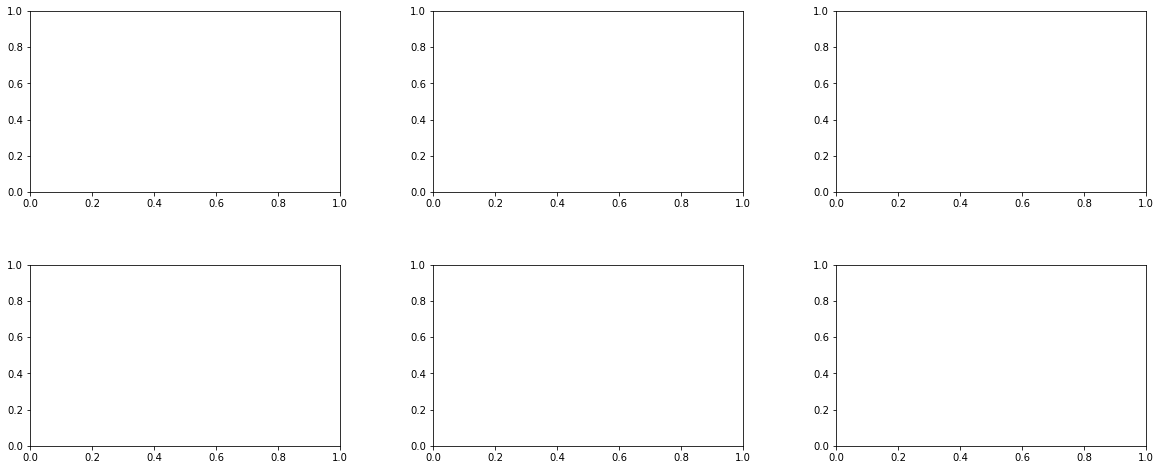

In [79]:
fig, axes = plt.subplots(2, 3, figsize=(20, 8)) 
plt.subplots_adjust(wspace=0.3, hspace=0.4)


def make_bar(ax, x0=0, y0=0, width = 0.5, height=1 , cmap="cividis",  
              norm=matplotlib.colors.Normalize(vmin=-0.5, vmax=0.5), **kwargs ):
    # Make data
    u = np.linspace(0, 2*np.pi, 4+1)+np.pi/4.
    v_ = np.linspace(np.pi/4., 3./4*np.pi, 100)
    v = np.linspace(0, np.pi, len(v_)+2 )
    v[0] = 0 ;  v[-1] = np.pi; v[1:-1] = v_
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))

    xthr = np.sin(np.pi/4.)**2 ;  zthr = np.sin(np.pi/4.)
    x[x > xthr] = xthr; x[x < -xthr] = -xthr
    y[y > xthr] = xthr; y[y < -xthr] = -xthr
    z[z > zthr] = zthr  ; z[z < -zthr] = -zthr

    x *= 1./xthr*width; y *= 1./xthr*width
    z += zthr
    z *= height/(2.*zthr)
    #translate
    x += x0; y += y0
    #plot
    ax.plot_surface(x, y, z, cmap=cmap, norm=norm, **kwargs)

def make_bars(ax, x, y, height, width=1):
    widths = np.array(width)*np.ones_like(x)
    x = np.array(x).flatten()
    y = np.array(y).flatten()

    h = np.array(height).flatten()
    w = np.array(widths).flatten()
    norm = matplotlib.colors.Normalize(vmin=-0.5, vmax=0.5)
    for i in range(len(x.flatten())):
        make_bar(ax, x0=x[i], y0=y[i], width = w[i] , height=h[i], norm=norm)
        
ax = axes[0,0]
ax.plot(x, y, 'o--')
ax.set_xlabel('time')
ax.set_ylabel('amplitude')
ax.set_title('sin function')
ax.grid()

ax = axes[0,2]
ax.plot(x, y, 'mo--', label='series 1')
ax.set_xlabel('time')
ax.set_ylabel('amplitude')
ax.tick_params(axis='x', labelsize=6)
ax.legend()
ax.grid()

ax = axes[1,1]
ax.plot(x, y, 'o--', label='series 1')
ax.text(6, 0.4, 'sin function')
ax.set_xlabel('time')
ax.set_ylabel('amplitude')
ax.legend(loc='upper right')
ax.grid()

ax = axes[1,2]
ax.plot(x, y, 'o--', label='series 1')
ax.text(0.5, 0.5, '${mean}_{y}$ = %0.2f' % np.mean(y), bbox = {'edgecolor':'red', 'facecolor':'white'}, 
        fontsize=14, transform=ax.transAxes, ha='center') # transform=ax.transAxes: scaled coords
ax.set_title('sin function')
ax.set_xlabel('time')
ax.set_ylabel('amplitude')
ax.legend(loc='upper right', edgecolor='red')
ax.grid()

fig.text(0.5, -0.005, 'Different views of sin function', fontsize=20, ha='center') # transform=ax.transAxes: scaled coords
plt.show()

In [14]:
print("The angle is $2\pi$ radians")

The angle is $2\pi$ radians


In [15]:
print("The function r$f(x) = \frac{17}{x-4}$ has a discontinuity at $x = 4$.")

The function r$f(x) = rac{17}{x-4}$ has a discontinuity at $x = 4$.


In [23]:
#Importing data

HH_i=np.mean(np.loadtxt('HH.lvm'))
HV_i=np.mean(np.loadtxt('HV.lvm'))
HD_i=np.mean(np.loadtxt('HD.lvm'))
HL_i=np.mean(np.loadtxt('HL.lvm'))
VV_i=np.mean(np.loadtxt('VV.lvm'))
VH_i=np.mean(np.loadtxt('VH.lvm'))
VD_i=np.mean(np.loadtxt('VD.lvm'))
VL_i=np.mean(np.loadtxt('VL.lvm'))
DV_i=np.mean(np.loadtxt('DV.lvm'))
DH_i=np.mean(np.loadtxt('DH.lvm'))
DR_i=np.mean(np.loadtxt('DR.lvm'))
DD_i=np.mean(np.loadtxt('DD.lvm'))
RH_i=np.mean(np.loadtxt('RH.lvm'))
RV_i=np.mean(np.loadtxt('RV.lvm'))
RD_i=np.mean(np.loadtxt('RD.lvm'))
RL_i=np.mean(np.loadtxt('RL.lvm'))

In [24]:
print(DD_i)

218.88888888888889


In [25]:
# Datos experimentales

#datos = [161.783, 130., 22.0208, 114.095, 58.4091, 157.083, 120.87, 126.167, 26.7692, 51.8, 180.5, 74.0333, 121.167, 133.545, 118.733, 212.85]

In [26]:
#datos_finales=[datos[0],datos[2],datos[10],datos[8],datos[12],datos[14],datos[6],datos[4],datos[7],datos[5],datos[13],datos[1],datos[9],datos[11],datos[3],datos[15]]

In [27]:
datos_finales = [HH_i,HV_i,VV_i,VH_i,RH_i,RV_i,DV_i,DH_i,DR_i,DD_i,RD_i,HD_i,VD_i,VL_i,HL_i,RL_i]

In [28]:
print(datos_finales)

[218.35, 5.627906976744186, 222.5581395348837, 21.568181818181817, 164.38636363636363, 87.73913043478261, 130.47727272727272, 107.67441860465117, 125.06818181818181, 218.88888888888889, 109.38095238095238, 104.13333333333334, 127.79069767441861, 101.23529411764706, 119.20454545454545, 251.02380952380952]


In [29]:
sum4 = np.sum(datos_finales[:4])

In [30]:
m = np.copy(np.array(datos_finales).reshape(16, 1, 1))

In [31]:
p_p = np.sum(np.array(M_m)*m, axis=0)/sum4
print(p_p)

[[ 0.466456+0.j       -0.016782-0.015414j -0.026243+0.094909j  0.496992-0.035102j]
 [-0.016782+0.015414j  0.012023+0.j       -0.06599 -0.031625j  0.035001-0.056299j]
 [-0.026243-0.094909j -0.06599 +0.031625j  0.046076+0.j        0.012236+0.044494j]
 [ 0.496992+0.035102j  0.035001+0.056299j  0.012236-0.044494j  0.475446+0.j      ]]


In [32]:
# bell state density matrix

In [33]:
p_real=np.array([[0.5,0,0,0.5],[0,0,0,0],[0,0,0,0],[0.5,0,0,0.5]])

In [81]:
#Fidelidad

phi = 1./np.sqrt(2)*(np.kron(H,H)+np.kron(V,V))
phi_density = np.matmul(phi,np.conjugate(phi).T)

q1 = np.matmul(p_MLE, phi)
fidelity = np.matmul(np.conjugate(phi).T, q1)

print(fidelity)

[[0.864618+0.j]]


In [35]:
print(np.linalg.eig(phi_density)[0])

[1. 0. 0. 0.]


In [36]:
#Eigenvalues
engv = np.linalg.eig(p_p)[0]

for j in range(len(engv)):
    if np.imag(engv[j])<5e-10: engv[j] = np.real(engv[j])
print(engv)

[ 0.971536+0.j  0.172799+0.j -0.106774+0.j -0.037562+0.j]


In [37]:
#entropy

en = -1.0*np.sum(engv*np.log2(engv))
print(en)

(-0.044292148646621676+0.6541800145349252j)


In [38]:
#purity
print(np.trace(p_p**2))

(0.4458972633783791+0j)


In [39]:
#trace
print(np.trace(p_p))

(0.9999999999999998+0j)


In [40]:
# Maximum likelihood aproximation

In [41]:
#Minors
def get_minors(matrix, m, n):
    minors = []
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if i != m and j != n:
                minor = matrix[i][j]
                minors.append(minor)
    return np.array(minors).reshape(len(matrix)-1, len(matrix)-1)

minors = get_minors(densid_jm,0,0)

In [42]:
print(minors)

[[ 0.004543+0.j        0.02713 -0.014596j -0.064826-0.00762j ]
 [ 0.02713 +0.014596j  0.006225+0.j       -0.069453+0.013383j]
 [-0.064826+0.00762j  -0.069453-0.013383j  0.502019+0.j      ]]


In [43]:
#Cortar elementos menores a e-10
def chop(q_vec):
    for j in range(len(q_vec)):
        if np.abs(np.imag(q_vec[j]))<9e-10: q_vec[j] = np.real(q_vec[j])
        if np.abs(np.real(q_vec[j]))<9e-10: q_vec[j] = np.imag(q_vec[j])*1.j

In [44]:
#determinants
det_p = np.real(np.linalg.det(p_p))

M11 = np.array(get_minors(p_p,0,0))
M12 = np.array(get_minors(p_p,0,1))
M11_22 = np.array(get_minors(M11,0,0))
M12_23 = np.array(get_minors(M12,0,1))
M11_23 = np.array(get_minors(M11,0,1))

detM11 = np.real(np.linalg.det(M11))
detM12 = np.linalg.det(M12)
detM11_22 = np.real(np.linalg.det(M11_22))
detM12_23 = np.linalg.det(M12_23)
detM11_23 = np.linalg.det(M11_23)

In [45]:
print(M11_23)

[[-0.06599 +0.031625j  0.012236+0.044494j]
 [ 0.035001+0.056299j  0.475446+0.j      ]]


In [46]:
print(detM11_22)

0.01977701118710597


In [47]:
print(p_p)

[[ 0.466456+0.j       -0.016782-0.015414j -0.026243+0.094909j  0.496992-0.035102j]
 [-0.016782+0.015414j  0.012023+0.j       -0.06599 -0.031625j  0.035001-0.056299j]
 [-0.026243-0.094909j -0.06599 +0.031625j  0.046076+0.j        0.012236+0.044494j]
 [ 0.496992+0.035102j  0.035001+0.056299j  0.012236-0.044494j  0.475446+0.j      ]]


In [48]:
print(np.linalg.eig(p_p)[0])

[ 0.971536-3.691099e-18j  0.172799+2.831642e-17j -0.106774-4.291441e-18j -0.037562-3.421167e-17j]


In [49]:
#T matrix
T1 = [np.sqrt(np.abs(det_p/detM11))*1.j,0,0,0]
T2 = [detM12/(1.j*np.sqrt(-detM11*detM11_22)),1.j*np.sqrt(detM11/-detM11_22),0,0]
T3 = [detM12_23/(np.sqrt(p_p[3,3])*1.j*np.sqrt(np.abs(detM11_22))),detM11_23/(np.sqrt(p_p[3,3])*1.j*np.sqrt(np.abs(detM11_22))),np.sqrt(1.0*detM11_22/p_p[3,3]),0]
T4 = [p_p[3,0]/np.sqrt(p_p[3,3]),p_p[3,1]/np.sqrt(p_p[3,3]),p_p[3,2]/np.sqrt(p_p[3,3]),np.sqrt(p_p[3,3])]
chop(T1)
chop(T2)
chop(T3)
chop(T4)
T = np.array([T1,T2,T3,T4], dtype = 'complex128')
print(T)

[[ 0.      +0.566978j  0.      +0.j        0.      +0.j        0.      +0.j      ]
 [-0.498652+0.056673j  0.      +0.32543j   0.      +0.j        0.      +0.j      ]
 [-0.697822+0.175278j  0.131898+0.302138j  0.203953+0.j        0.      +0.j      ]
 [ 0.720774+0.050908j  0.050761+0.081649j  0.017745-0.064529j  0.689526+0.j      ]]


In [50]:
#T parameters

q1 = T[0,0]
q2 = T[1,1]
q3 = T[2,2]
q4 = T[3,3]
q5 = np.real(T[1,0])
q6 = np.imag(T[1,0])
q7 = np.real(T[2,1])
q8 = np.imag(T[2,1])
q9 = np.real(T[3,2])
q10 = np.imag(T[3,2])
q11 = np.real(T[2,0])
q12 = np.imag(T[2,0])
q13 = np.real(T[3,1])
q14 = np.imag(T[3,1])
q15 = np.real(T[3,0])
q16 = np.imag(T[3,0])

q_vec = np.array([q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16])
chop(q_vec)
print(np.real(q_vec))

[ 0.        0.        0.203953  0.689526 -0.498652  0.056673  0.131898  0.302138  0.017745 -0.064529 -0.697822  0.175278  0.050761  0.081649  0.720774  0.050908]


In [51]:
#Estimacion inicial
p_cor = np.matmul(np.conjugate(T).T,T)/np.trace(np.matmul(np.conjugate(T).T,T))
print(p_cor)

[[ 0.683967+0.j        0.008524-0.144147j -0.056315-0.035261j  0.210727-0.014884j]
 [ 0.008524+0.144147j  0.094906+0.j        0.009554-0.028131j  0.014841-0.023871j]
 [-0.056315+0.035261j  0.009554+0.028131j  0.019536+0.j        0.005188+0.018866j]
 [ 0.210727+0.014884j  0.014841+0.023871j  0.005188-0.018866j  0.201591+0.j      ]]


In [52]:
# log function

p_func = 0

for j in range(16):
    sandwR = np.matmul(p_cor,BASIS_Q2_kets[j])
    sandwL = (np.power((sum4*np.matmul(np.conjugate(BASIS_Q2_kets[j]).T,sandwR)-datos_finales[j]),2))/(2*sum4*(np.matmul(np.conjugate(BASIS_Q2_kets[j]).T,sandwR)))
    p_func = p_func + sandwL

In [53]:
def log_p(t):
    t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16 = t
    T1 = [t1,0,0,0]
    T2 = [t5+1.j*t6,t2,0,0]
    T3 = [t11+1.j*t12,t7+1.j*t8,t3,0]
    T4 = [t15+1.j*t16,t13+1.j*t14,t9+1.j*t10,t4]
    T = np.array([T1,T2,T3,T4],dtype = 'complex128')
    p_cor = np.matmul(np.conjugate(T).T,T)/np.trace(np.matmul(np.conjugate(T).T,T))
    
    p_func = 0
    for j in range(16):
        sandwR = np.matmul(p_cor,BASIS_Q2_kets[j])
        sandwL = ((sum4*np.matmul(np.conjugate(BASIS_Q2_kets[j]).T,sandwR)-datos_finales[j])**2)/(2*sum4*(np.matmul(np.conjugate(BASIS_Q2_kets[j]).T,sandwR)))
        sandwich = sandwL.flatten()[0]
        p_func = p_func + sandwich
    return np.real(p_func)

In [54]:
from scipy.optimize import minimize
L_res = minimize(log_p,q_vec, method = 'Nelder-Mead', tol = 5e-6,options={'maxiter':100000})

C:\Users\Fernando\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [55]:
T_res = minimize(log_p,q_vec, method = 'Powell', tol = 5e-15,options={'maxiter':100000})

C:\Users\Fernando\anaconda3\lib\site-packages\scipy\optimize\optimize.py:3075: ComplexWarning: Casting complex values to real discards the imaginary part
  direc[-1] = direc1


In [56]:
valor_minimo = L_res.x
valor_minimo2 = T_res.x

In [57]:
def p_def(t):
    t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16 = t
    T1 = [t1,0,0,0]
    T2 = [t5+1.j*t6,t2,0,0]
    T3 = [t11+1.j*t12,t7+1.j*t8,t3,0]
    T4 = [t15+1.j*t16,t13+1.j*t14,t9+1.j*t10,t4]
    T = np.array([T1,T2,T3,T4],dtype = 'complex64')
    p_cor = np.matmul(np.conjugate(T).T,T)/np.trace(np.matmul(np.conjugate(T).T,T))
    return p_cor

In [58]:
print(valor_minimo)

[-0.041149  0.009891  0.865344  2.669553 -0.013742  0.108431 -0.210774  0.374365  0.034841 -0.044517 -0.317624 -1.385871  0.155632  0.146064  2.286993  0.147293]


In [59]:
print(p_def(valor_minimo))

[[ 0.473319+0.j       -0.004843-0.006558j -0.013103+0.070948j  0.396549-0.02554j ]
 [-0.004843+0.006558j  0.014954+0.j       -0.011917-0.021822j  0.026986-0.025326j]
 [-0.013103-0.070948j -0.011917+0.021822j  0.048845+0.j        0.006041+0.007719j]
 [ 0.396549+0.02554j   0.026986+0.025326j  0.006041-0.007719j  0.462882+0.j      ]]


In [60]:
print(p_def(valor_minimo2))

[[ 0.473402+0.j       -0.004787-0.006516j -0.013095+0.071104j  0.396524-0.026661j]
 [-0.004787+0.006516j  0.01495 +0.j       -0.011682-0.021942j  0.027252-0.025231j]
 [-0.013095-0.071104j -0.011682+0.021942j  0.048864+0.j        0.006409+0.007721j]
 [ 0.396524+0.026661j  0.027252+0.025231j  0.006409-0.007721j  0.462784+0.j      ]]


In [79]:
p_MLE = p_def(valor_minimo2)

#Von Neumann Entropy

vN = np.log2(np.real(np.linalg.eig(p_MLE)[0]))*np.real(np.linalg.eig(p_MLE)[0])
print(vN)

print(-1.0*(vN[0]+vN[1]+vN[2]))

[-1.766790e-01 -3.849117e-01 -1.612844e-07           nan]
0.561590850353241


C:\Users\Fernando\AppData\Local\Temp/ipykernel_23232/2214155919.py:5: RuntimeWarning: invalid value encountered in log2
  vN = np.log2(np.real(np.linalg.eig(p_MLE)[0]))*np.real(np.linalg.eig(p_MLE)[0])


In [65]:
# CONCURRENCIA Y TANGLE

flip = np.kron(s2,s2)
#R matrix
R_left = np.matmul(p_MLE, flip)
chop_mtx(R_left)
R_right = np.matmul(np.conjugate(p_MLE).T, flip)
chop_mtx(R_right)
R_mtx = np.matmul(R_left,R_right)
chop_mtx(R_mtx)

print(R_mtx)

[[ 3.741469e-01-0.023333j  1.742026e-03-0.02575j  -1.082590e-02-0.008454j  3.762321e-01+0.j      ]
 [ 8.694009e-03-0.007528j -1.071305e-03-0.001834j  2.404564e-04+0.j        1.082590e-02-0.008454j]
 [-4.400355e-03-0.028833j  1.241087e-04+0.j       -1.071305e-03+0.001834j -1.742026e-03-0.02575j ]
 [ 3.670509e-01+0.j        4.400355e-03-0.028833j -8.694009e-03-0.007528j  3.741469e-01+0.023333j]]


In [66]:
print(flip)

[[ 0.+0.j  0.-0.j  0.-0.j -1.+0.j]
 [ 0.+0.j  0.+0.j  1.-0.j  0.-0.j]
 [ 0.+0.j  1.-0.j  0.+0.j  0.-0.j]
 [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]]


In [67]:
#Probabilities Sv
Sv = []
for j in range(16):
    S_right = np.matmul(p_MLE,BASIS_Q2_kets[j])
    chop_mtx(S_right)
    S_lef = np.matmul(np.conjugate(BASIS_Q2_kets[j]).T,S_right)
    chop_mtx(S_lef)
    Sv.append(S_lef[0,0])
Sv = np.array(Sv)
print(np.real(Sv))

[0.473402 0.01495  0.462784 0.048864 0.332237 0.213636 0.266119 0.248038 0.255321 0.45031  0.249446 0.239389 0.262233 0.248104 0.250692 0.476437]


In [68]:
#Sv = data_j/Normal
#print(Sv)

In [69]:
def chop_mtx(x):
    x=np.array(x)
    for i in range(x.shape[0]):
        chop(x[i])

In [70]:
#other way R 

# q elements
q_mat = []
for u in range(16):
    for v in range(16):
        sum_left = np.matmul(np.matmul(M_m[u],flip),np.matmul(M_m[v].T,flip))
        sum_right = np.matmul(np.matmul(M_m[v],flip),np.matmul(M_m[u].T,flip))
        q_sum = sum_left + sum_right
        q_mat.append(q_sum)
q_mat = np.array(q_mat)

In [71]:
R_other = np.zeros((4,4))

for u in range(16):
    for v in range(16):
        R_element = q_mat[16*u+v]*Sv[u]*Sv[v]
        R_other = R_other + R_element
R_other= 0.5*np.array(R_other)
print(R_other)

[[ 0.379257-0.001603j  0.002413+0.022754j -0.011459+0.010477j  0.374379-0.024732j]
 [ 0.008932-0.005255j  0.00358 +0.001603j -0.000417-0.001253j  0.011459-0.010477j]
 [-0.005151-0.031137j -0.002072+0.003258j  0.00358 +0.001603j -0.002413-0.022754j]
 [ 0.366272+0.024774j  0.005151+0.031137j -0.008932+0.005255j  0.379257-0.001603j]]


In [72]:
def may_men(x):
    x= np.array(x)
    d = np.abs(np.sort(-1.0*x))
    return d

In [73]:
# eigenvalores de R with modified R

R_a1 = np.sqrt(may_men(np.linalg.eig(R_mtx)[0]))*np.array([1,-1,-1,-1])
R_a2 = np.sqrt(may_men(np.linalg.eig(R_other)[0]))*np.array([1,-1,-1,-1])
chop(R_a1)
chop(R_a2)

In [74]:
print(R_a1)
print(R_a2)

[ 8.625666e-01 -4.615335e-02 -1.111132e-08 -3.542279e-09]
[ 8.670176e-01 -1.181340e-01 -9.825405e-09 -1.197746e-08]


In [75]:
asdas = may_men(np.linalg.eig(R_other)[0])

gola = 0
for i in range(4):
    ada = np.sign(0.5 - i)*np.sqrt(asdas[i])
    gola = gola + ada
print(gola)

0.7488836357493562


In [88]:
# Concurrencia 

C_con1 = np.maximum(0,np.sum(R_a1))
C_con2 = np.maximum(0,np.sum(R_a2))
print(C_con1,C_con2)

0.8164132467017718 0.7488836357493562


In [89]:
print(C_con1**2,C_con2**2)

0.6665305893901282 0.5608266998931745


In [78]:
# Error de concurrencia 


print(C_con1**2)

0.6665305893901282


In [74]:
# WAVE PLATES

def QWP(q):
    f1 = np.array([1-1.j*np.cos(2*q),1.j*np.sin(2*q)], dtype = 'complex64')
    chop(f1)
    f2 = np.array([1.j*np.sin(2*q),1+1.j*np.cos(2*q)], dtype = 'complex64')
    chop(f2)
    QWP_m = (1/np.sqrt(2))*np.array([f1,f2],dtype='complex64')
    return QWP_m

def GT_POL(p):
    f1 = np.array([np.cos(p)**2,np.cos(p)*np.sin(p)], dtype = 'complex64')
    chop(f1)
    f2 = np.array([np.cos(p)*np.sin(p),np.sin(p)**2], dtype = 'complex64')
    chop(f2)
    pol = np.array([f1,f2],dtype='complex64')
    return pol

In [75]:
print(np.matmul(QWP(np.pi/4),np.matmul(GT_POL(np.pi/4),V)))

[[0.353553+0.353553j]
 [0.353553+0.353553j]]


In [76]:
print(np.matmul(QWP(0),np.matmul(GT_POL(0),V)))

[[0.+0.j]
 [0.+0.j]]


In [77]:
QWP1 = np.array([0,0,0,0,np.pi/4,np.pi/4,np.pi/4,np.pi/4,0,0,0,0,np.pi/4,np.pi/4,np.pi/4,np.pi/4])
POL1 = np.array([0,0,0,0,np.pi/4,np.pi/4,np.pi/4,np.pi/4,np.pi/2,np.pi/2,np.pi/2,np.pi/2,np.pi/2,np.pi/2,np.pi/2,np.pi/2])
QWP2 = np.array([0,np.pi/4,0,np.pi/4,0,np.pi/4,0,np.pi/4,0,np.pi/4,0,np.pi/4,0,np.pi/4,0,np.pi/4])
POL2 = np.array([0,np.pi/4,np.pi/2,0,0,np.pi/4,np.pi/2,np.pi/2,0,np.pi/4,np.pi/2,0,0,np.pi/4,np.pi/2,0])

In [78]:
# ESTADOS QUE PASAN POR EL POL

States_o1 = [H,H,H,H,D,D,D,D,V,V,V,V,V,V,V,V]
States_o2 = [H,D,V,H,H,D,V,V,H,D,V,H,H,D,V,H]


In [79]:
# h'v 'd 'a

kets_rot = []
for i,j,z in zip(QWP1,POL1,States_o1):
    k=0
    evo_mes = np.matmul(GT_POL(j),z)
    evo_rot = np.matmul(QWP(i),evo_mes)
  
    nam = np.matmul(H.T, evo_rot)[0]
    if nam!= 0: 
        evo_rot =evo_rot*np.conjugate(nam)
        k=k+1
    nem = np.matmul(V.T, evo_rot)[0]
    if nem!= 0 and k==0:
        evo_rot =evo_rot*np.conjugate(nem)
        
    norm = np.sqrt(np.matmul(np.conjugate(evo_rot).T,evo_rot)[0])
    if norm!= 0: evo_rot = evo_rot/norm
   
    kets_rot.append(evo_rot)
kets_rot=np.array(kets_rot)

In [90]:
# james states from plates 
from numerics import der1_min_err as der_w

def QWP_j(q,h= np.pi/2, tol=5e-15):
    f1 = np.array([1.j-np.cos(2*q),np.sin(2*q)], dtype = 'complex64')
    chop(f1)
    f2 = np.array([np.sin(2*q),1.j+np.cos(2*q)], dtype = 'complex64')
    chop(f2)
    QWP_m = (1/np.sqrt(2))*np.array([f1,f2],dtype='complex64')
    
    #derivada 
    f1_der = lambda q1: 1.j-np.cos(2*q1)
    f2_der = lambda q2: np.sin(2*q2)
    f3_der = lambda q3: np.sin(2*q3)
    f4_der = lambda q4: 1.j +np.cos(2*q4)
    
    f_der = np.array([f1_der,f2_der,f3_der,f4_der])
    
    QWP_der = []
    for i in f_der:
        derfi_new = der_w(i,q, h, tol)
        QWP_der.append(derfi_new[0])
    QWP_der=(1/np.sqrt(2))*np.array(QWP_der, dtype = 'complex64').reshape(2,2)
    chop(QWP_der[0])
    chop(QWP_der[1])
        
    return np.array([QWP_m,QWP_der])

def HWP_j(p,h= np.pi/2, tol=5e-15):
    f1 = np.array([np.cos(2*p), -np.sin(2*p)], dtype = 'complex64')
    chop(f1)
    f2 = np.array([-np.sin(2*p),-np.cos(2*p)], dtype = 'complex64')
    chop(f2)
    pol = np.array([f1,f2],dtype='complex64')
    
      #derivada 
    f1_der = lambda q1: np.cos(2*q1)
    f2_der = lambda q2: -np.sin(2*q2)
    f3_der = lambda q3: -np.sin(2*q3)
    f4_der = lambda q4: -np.cos(2*q4)
    
    f_der = np.array([f1_der,f2_der,f3_der,f4_der])
    
    HWP_der = []
    for i in f_der:
        derfi_new = der_w(i,p, h, tol)
        HWP_der.append(derfi_new[0])
    HWP_der= np.array(HWP_der, dtype = 'complex64').reshape(2,2)
    chop(HWP_der[0])
    chop(HWP_der[1])
        
    return np.array([pol,HWP_der])

In [91]:
#james config
hj1 = np.array([np.pi/4,np.pi/4,0,0,np.pi/8,np.pi/8,np.pi/8,np.pi/8,np.pi/8,np.pi/8,np.pi/8,np.pi/4,0,0,np.pi/4,np.pi/8])
qj1 = np.array([0,0,0,0,0,0,np.pi/4,np.pi/4,np.pi/4,np.pi/4,0,0,0,0,0,0])
hj2 = np.array([np.pi/4,0,0,np.pi/4,np.pi/4,0,0,np.pi/4,np.pi/8,np.pi/8,np.pi/8,np.pi/8,np.pi/8,np.pi/8,np.pi/8,np.pi/8])
qj2 = np.array([0,0,0,0,0,0,0,0,0,np.pi/4,np.pi/4,np.pi/4,np.pi/4,np.pi/2,np.pi/2,np.pi/2])

In [92]:
# Makinola generadora de kets

def ketQHV(h,q,num1,num2): 
    kets_rot = []
    for i,j in zip(q,h):
        k = 0
        evo_rot = np.matmul(QWP_j(i)[num1],np.matmul(HWP_j(j)[num2],V))
        nam = np.matmul(H.T, evo_rot)[0]
        if nam!= 0: 
            evo_rot =evo_rot*np.conjugate(nam)
            k=k+1
        nem = np.matmul(V.T, evo_rot)[0]
        if nem!= 0 and k==0:
            evo_rot =evo_rot*np.conjugate(nem)
        norm = np.sqrt(np.matmul(np.conjugate(evo_rot).T,evo_rot)[0])
        if norm!= 0: evo_rot = evo_rot/norm
        kets_rot.append(evo_rot)
    kets_rot=np.array(kets_rot)
    return kets_rot

In [93]:
#kets paper
kets1_j = ketQHV(hj1,qj1,0,0)
kets2_j = ketQHV(hj2,qj2,0,0)

# hwp1: theta 1, qwp1: theta2, hwp2: theta 3, qwp2: theta4 

#derivada de kets_paper
kets1_derh1_j =  ketQHV(hj1,qj1,0,1)
kets1_derq2_j =  ketQHV(hj1,qj1,1,0)
kets2_derh3_j =  ketQHV(hj2,qj2,0,1)
kets2_derq4_j =  ketQHV(hj2,qj2,1,0)

invalid value encountered in double_scalars


In [94]:
# 2 qubits system james

#ket1 x ket2
kets_2q_j=np.array([np.kron(kets1_j[i],kets2_j[i]) for i in range(16)])
#derh1_ket1 x ket2
kets_2q_derh1_j = np.array([np.kron(kets1_derh1_j[i],kets2_j[i]) for i in range(16)])  
#kets_2q_derh1_j = np.copy(cam_h1)
#derq1_ket1x ket2
kets_2q_derq1_j = np.array([np.kron(kets1_derq2_j[i],kets2_j[i]) for i in range(16)])  
#kets_2q_derq1_j = np.copy(cam_q1)
#ket1 x derh2_ket2
kets_2q_derh2_j = np.array([np.kron(kets1_j[i],kets2_derh3_j[i]) for i in range(16)]) 
#kets_2q_derh2_j = np.copy(cam_h2)
#ket1 x derq2_ket2
kets_2q_derq2_j = np.array([np.kron(kets1_j[i],kets2_derq4_j[i]) for i in range(16)]) 
#kets_2q_derq2_j = np.copy(cam_q2)

#kets con derivada

#d/dthe1 |psi>
#d/dthe2 |psi>
#d/dthe3 |psi>
#d/dthe4 |psi>

der_kets2q_j = np.array([kets_2q_derh1_j,kets_2q_derq1_j,kets_2q_derh2_j,kets_2q_derq2_j],dtype='complex64')


In [157]:
print(kets_2q_j[15])

[[0.5+0.j ]
 [0. +0.5j]
 [0. -0.5j]
 [0.5+0.j ]]


In [158]:
# se comprueba que da lo que ha puesto en el paper, el camino de q aqui en adelante es lo mismo de arriba

In [159]:
#INCERTIDUMBRES 

In [103]:
# fiuv matrix

f_ivu = []
for i in range(4):
    f_vu = []
    for v in range(16):        
        for u in range(16):
            sum_left = np.matmul(np.conjugate(der_kets2q_j[i][v]).T,np.matmul(M_m[u],kets_2q_j[v]))
            sum_right = np.matmul(np.conjugate(kets_2q_j[v]).T,np.matmul(M_m[u],der_kets2q_j[i][v]))
            sum_vu = sum_left + sum_right
            f_vu.append(sum_vu[0])
    chop(f_vu)
    f_vu = np.array(f_vu).reshape(16,16)
    f_ivu.append(f_vu)
    
f_ivu= np.array(f_ivu,dtype = 'complex64')

In [104]:
print(f_ivu.shape)

(4, 16, 16)


In [105]:
#lambda - 1 column vector (16 elements)

Lamb = []
for v in range(16):
    com = 0
    for i in range(4):
        for e in range(16):
            for l in range(16):
                sum_f = f_ivu[i,v,e]*f_ivu[i,v,l]*Sv[e]*Sv[l]
                com = com + sum_f
    new_sumf = Sv[v]/Normal + com
    Lamb.append(new_sumf)
Lamb = np.array(Lamb,dtype='complex64')
chop(Lamb)
print(Lamb[13]) 



(0.20694044+0j)


In [106]:
##Von Neummann Entropy Uncertanty

In [82]:
print(np.linalg.eig(p_MLE)[0])

[ 8.684805e-01+3.979943e-18j  1.315195e-01-6.327788e-20j  5.899933e-09+1.971772e-18j -2.796423e-10+2.917275e-18j]


In [83]:
auto_p_MLE = np.linalg.eig(p_MLE)[0]
ams = 0
for a in range(4):
    bob = auto_p_MLE[a]*np.log2(auto_p_MLE[a])
    ams = ams + bob
ams = -1.0*ams
print(ams)

(0.5615908388502584+1.2674395327271637e-09j)


In [84]:
plate = 0
for v in range(16):
    gold = 0
    for a in range(4):
        phi_mul = np.matmul(np.conjugate(kets_2q_j[a]).T,np.matmul(M_m[v],kets_2q_j[a]))[0]*((1+np.log(auto_p_MLE[a]))/np.log(2))
        gold = gold + phi_mul
    plate = plate + (gold**2)*Lamb[v]
print(np.sqrt(np.real(plate)))

NameError: name 'kets_2q_j' is not defined

In [85]:
print(np.log(np.e))

1.0


In [86]:
#linear entropy

ln=0
for i in range(4):
    ln = ln + auto_p_MLE[i]**2
ln_sum = (4./3)*(1-ln)

print(ln_sum)

(0.3045923212176425-9.195148647262723e-18j)


In [87]:
p_lambda=0
for v in range(16):
    p_v=0
    for u in range(16):
        p_mul = np.trace(np.matmul(M_m[u],M_m[v]))*Sv[u]
        p_v = p_v + p_mul
    p_lambda = p_lambda + (((8./3)*p_v)**2)*Lamb[v]
print(np.sqrt(np.real(p_lambda)))

NameError: name 'Lamb' is not defined

In [169]:
#Concurrence



In [ ]:
# jmes kets through functions

a_j = lambda h,q: (np.sin(2*h)+1.j*np.sin(2*h -2*q))/np.sqrt(2)
b_j = lambda h,q: (np.cos(2*h)-1.j*np.cos(2*h -2*q))/np.sqrt(2)

a_j_h = lambda h,q: (2*np.cos(2*h)+2.j*np.cos(2*h -2*q))/np.sqrt(2)
b_j_h = lambda h,q: (-2*np.sin(2*h)+2.j*np.sin(2*h -2*q))/np.sqrt(2)

a_j_q = lambda h,q: (-2.j*np.cos(2*h -2*q))/np.sqrt(2)
b_j_q = lambda h,q: -(2.j*np.sin(2*h -2*q))/np.sqrt(2)


In [ ]:
# 2 qubits system james

#ket1 x ket2
kets_2q_j=np.array([np.kron(kets1_j[i],kets2_j[i]) for i in range(16)])
#derh1_ket1 x ket2
kets_2q_derh1_j = np.array([np.kron(kets1_derh1_j[i],kets2_j[i]) for i in range(16)])  
#derq1_ket1x ket2
kets_2q_derq1_j = np.array([np.kron(kets1_derq2_j[i],kets2_j[i]) for i in range(16)])  
#ket1 x derh2_ket2
kets_2q_derh2_j = np.array([np.kron(kets1_j[i],kets2_derh3_j[i]) for i in range(16)])  
#ket1 x derq2_ket2
kets_2q_derq2_j = np.array([np.kron(kets1_j[i],kets2_derq4_j[i]) for i in range(16)])  

#kets con derivada

#d/dthe1 |psi>
#d/dthe2 |psi>
#d/dthe3 |psi>
#d/dthe4 |psi>

der_kets2q_j = np.array([kets_2q_derh1_j,kets_2q_derq1_j,kets_2q_derh2_j,kets_2q_derq2_j],dtype='complex64')


In [ ]:
ifss = 7
some_f = np.array(a_j(hj1[ifss],qj1[ifss])*a_j_q(hj2[ifss],qj2[ifss])*np.kron(H,H) 
                  + a_j(hj1[ifss],qj1[ifss])*b_j_q(hj2[ifss],qj2[ifss])*np.kron(H,V) 
                  + b_j(hj1[ifss],qj1[ifss])*a_j_q(hj2[ifss],qj2[ifss])*np.kron(V,H) 
                  + b_j(hj1[ifss],qj1[ifss])*b_j_q(hj2[ifss],qj2[ifss])*np.kron(V,V), dtype='complex64')

chop(some_f)
yam = np.matmul(np.conjugate(np.kron(H,H)).T,some_f)
yem = np.matmul(np.conjugate(np.kron(H,V)).T,some_f)
yim = np.matmul(np.conjugate(np.kron(V,H)).T,some_f)
yom = np.matmul(np.conjugate(np.kron(V,V)).T,some_f)

ncount = 0
if yam!= 0 and ncount==0:
    some_f=some_f*np.conjugate(yam) 
    ncount+=1
if yem!= 0 and ncount==0:
    some_f=some_f*np.conjugate(yem)
    ncount+=1
if yim!= 0 and ncount==0:
    some_f=some_f*np.conjugate(yim)
    ncount+=1
if yom!= 0 and ncount==0:
    some_f=some_f*np.conjugate(yom)
    ncount+=1

jos = np.matmul(np.conjugate(some_f).T, some_f)[0]
if jos!=0: some_f=some_f/np.sqrt(jos)
    

print(some_f)

In [ ]:
print(kets_2q_derq2_j[7])

In [ ]:
#cam_h1
#cam_q1
#cam_h2
#cam_q2

In [ ]:
cam_q2= []
for ifss in range(16):
    some_f = np.array(a_j(hj1[ifss],qj1[ifss])*a_j_q(hj2[ifss],qj2[ifss])*np.kron(H,H) 
                  + a_j(hj1[ifss],qj1[ifss])*b_j_q(hj2[ifss],qj2[ifss])*np.kron(H,V) 
                  + b_j(hj1[ifss],qj1[ifss])*a_j_q(hj2[ifss],qj2[ifss])*np.kron(V,H) 
                  + b_j(hj1[ifss],qj1[ifss])*b_j_q(hj2[ifss],qj2[ifss])*np.kron(V,V), dtype='complex64')
    chop(some_f)
    yam = np.matmul(np.conjugate(np.kron(H,H)).T,some_f)
    yem = np.matmul(np.conjugate(np.kron(H,V)).T,some_f)
    yim = np.matmul(np.conjugate(np.kron(V,H)).T,some_f)
    yom = np.matmul(np.conjugate(np.kron(V,V)).T,some_f)
    
    ncount = 0
    if yam!= 0 and ncount==0:
        some_f=some_f*np.conjugate(yam)
        ncount+=1
    if yem!= 0 and ncount==0:
        some_f=some_f*np.conjugate(yem)
        ncount+=1
    if yim!= 0 and ncount==0:
        some_f=some_f*np.conjugate(yim)
        ncount+=1
    if yom!= 0 and ncount==0:
        some_f=some_f*np.conjugate(yom)
        ncount+=1
    
    jos = np.matmul(np.conjugate(some_f).T, some_f)[0]
    if jos!=0: some_f=some_f/np.sqrt(jos)
    
    cam_q2.append(some_f)
cam_q2 = np.array(cam_q2,dtype='complex64')

In [ ]:
print(kets_2q_derh2_j[8])

In [ ]:
print(cam_h2[8])

In [218]:
# Entanglament of formaation

# proyecciones de los espacios H1 Y H2 con bases M y N, respectivamente
M_s = np.array([H,V])
N_s = np.array([H,V])
M_s_pro = []

for i in range(2):
    for j in range(2):
        var_m= np.matmul(M_s[i],np.conjugate(M_s[j]).T)
        M_s_pro.append(var_m)
#Proyecciones de los espacios
M_s_pro = np.array(M_s_pro)
N_s_pro = np.copy(M_s_pro)

MN_s_pro = []
for i in range(4):
    for j in range(4):
        var_mn= np.matmul(np.kron(M_s_pro[i],M_s_pro[j]),np.conjugate(np.kron(M_s_pro[i],M_s_pro[j])).T)
        MN_s_pro.append(var_mn)

#Proyecciones del espacio H1 X H2
MN_s_pro = np.array(MN_s_pro)  


#kets de H1XH2
MN_kets = []
for i in range(2):
    for j in range(2):
        vark_mn= np.kron(M_s[i],M_s[j])
        MN_kets.append(vark_mn)
MN_kets = np.array(MN_kets)


#Sandwiches
num_ket= []
for i in range(4):
    for j in range(4):
        num_rec = np.matmul(np.conjugate(MN_kets[i]).T,np.matmul(p_MLE,MN_kets[j]))[0,0]
        num_ket.append(num_rec)

num_ket = np.array(num_ket)
print(num_ket)


[ 0.441951+0.j        0.089008-0.05348j  -0.095453+0.031717j  0.336629+0.106283j  0.089008+0.05348j   0.05496 +0.j       -0.028441-0.028916j  0.089845+0.076415j -0.095453-0.031717j
 -0.028441+0.028916j  0.07349 +0.j       -0.106369+0.028245j  0.336629-0.106283j  0.089845-0.076415j -0.106369-0.028245j  0.4296  +0.j      ]


In [222]:
print(Sv)

[0.441951+0.000000e+00j 0.05496 +0.000000e+00j 0.4296  +0.000000e+00j 0.07349 +0.000000e+00j 0.289437+0.000000e+00j 0.318695+0.000000e+00j 0.332124+0.000000e+00j 0.162267+0.000000e+00j
 0.302178+0.000000e+00j 0.39261 +0.000000e+00j 0.334069-1.387779e-17j 0.337463+0.000000e+00j 0.145176+0.000000e+00j 0.2233  +0.000000e+00j 0.301935+0.000000e+00j 0.499219-1.387779e-17j]


In [ ]:
[HHHH, HHHV, HHVH, HHVV, HV]

In [223]:
I = np.array([[1,0],[0,1]])

In [246]:

ele_sum = np.zeros((2,2), dtype='complex64')
print(ele_sum)
for i in range(4):
    elem_m = np.matmul(np.kron(np.conjugate(M_s[i]).T,I),np.matmul(p_MLE,np.kron(M_s[i],I)))
    print(elem_m.shape)
    ele_sum = ele_sum + elem_m
print(ele_sum)
                       


[[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
(2, 2)
(2, 2)


IndexError: index 2 is out of bounds for axis 0 with size 2

In [247]:
print(ele_sum)

[[ 0.51544 +0.j       -0.017361-0.025235j]
 [-0.017361+0.025235j  0.48456 +0.j      ]]


In [248]:
aut_ele = np.linalg.eig(ele_sum)[0]

In [250]:
eee = 0
for i in range(2):
    loops =aut_ele[i]*np.log2(aut_ele[i])
    eee = eee + loops
print(-1*eee)

(0.9966024081197404+4.1719447718509835e-19j)
